In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns

In [2]:
# Carregando os datasets (como os arquivos .csv são grandes importaremos apenas 100 linhas de cada)

costs_sample = pd.read_csv('costs_us.csv',nrows=100)
orders_log_us_sample = pd.read_csv('orders_log_us.csv',nrows=100)
visits_log_us_sample = pd.read_csv('visits_log_us.csv',nrows=100)

In [3]:
#Investigando o uso de memória do dataset 'costs_sample'
costs_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  100 non-null    int64  
 1   dt         100 non-null    object 
 2   costs      100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2 KB


In [4]:
# Para otimizar o dataset vamos transforma a coluna 'dt' de 'object' para timestamp

costs_sample['dt']=pd.to_datetime(costs_sample['dt'])

In [5]:
#Investigando o uso de memória do dataset 'costs_sample' otimizado
costs_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  100 non-null    int64         
 1   dt         100 non-null    datetime64[ns]
 2   costs      100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.5 KB


In [6]:
#Investigando o uso de memória do dataset 'orders_log_us_sample'
orders_log_us_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   100 non-null    object 
 1   Revenue  100 non-null    float64
 2   Uid      100 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 9.1 KB


In [7]:
# Sample do dataset 'não otimizado'

orders_log_us_sample.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
# Otimizando o dataset 'orders_log_sample'

orders_log_us_sample['Buy Ts']=pd.to_datetime(orders_log_us_sample['Buy Ts'])

In [9]:
#Investigando o uso de memória do dataset 'orders_log_us_sample' otimizado
orders_log_us_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   100 non-null    datetime64[ns]
 1   Revenue  100 non-null    float64       
 2   Uid      100 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 2.5 KB


In [10]:
# Sample do dataset 'otimizado'

orders_log_us_sample.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**Consideações sobre os datatypes de Revenue(float64) e Uid(uint64)**

- Uma opção para maior otimização de memória seria a transformação do tipo de dados de Revenue e Uid. Poderia se transformar os dados do Revenue(float64) para o tipo menor de float (float32). A consideração a se fazer aqui é se o valor a ser armazenado no Revenue caberia no float32.
- De forma similar, poderia se conseguir uma maior otimização diminuindo o tamanho do Uid, que é do tipo uint64 para um tipo menor de número inteiro (uint8, uint16, uint32). Antes de realizar essa operação é necessário garantir que os valores fiquem dentro do limite de memória do datatype a ser utilizado.

In [11]:
#Investigando o uso de memória do dataset 'visits_log_us_sample'
visits_log_us_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     100 non-null    object
 1   End Ts     100 non-null    object
 2   Source Id  100 non-null    int64 
 3   Start Ts   100 non-null    object
 4   Uid        100 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 22.7 KB


In [12]:
# Sample do dataset 'não otimizado'

visits_log_us_sample.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
31,desktop,2017-10-10 22:54:00,4,2017-10-10 22:43:00,10160380139945840521
78,desktop,2018-01-25 12:40:00,4,2018-01-25 12:31:00,14063997464143962003
40,desktop,2017-10-07 11:14:00,5,2017-10-07 11:08:00,14594305127324426841
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603
16,desktop,2018-05-14 08:45:00,5,2018-05-14 08:39:00,13958332529722257330


In [13]:
visits_log_us_sample['Device'].value_counts()

Device
desktop    73
touch      27
Name: count, dtype: int64

In [14]:
# Otimizando os dados de 'visits_log_us_sample'

# Convertendo Start Ts e End Ts para datetime
visits_log_us_sample['Start Ts'] = pd.to_datetime(visits_log_us_sample['Start Ts'])
visits_log_us_sample['End Ts'] = pd.to_datetime(visits_log_us_sample['End Ts'])

# Convertendo Device para Category
visits_log_us_sample['Device'] = visits_log_us_sample['Device'].astype('category')

In [15]:
#Investigando o uso de memória do dataset 'visits_log_us_sample' otimizado

visits_log_us_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     100 non-null    category      
 1   End Ts     100 non-null    datetime64[ns]
 2   Source Id  100 non-null    int64         
 3   Start Ts   100 non-null    datetime64[ns]
 4   Uid        100 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 3.6 KB


In [16]:
# Sample do dataset 'otimizado'

visits_log_us_sample.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
74,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3577449367987547907
38,touch,2018-03-01 08:45:00,4,2018-03-01 08:43:00,15763368622958393183
10,desktop,2017-07-14 12:44:00,5,2017-07-14 12:43:00,14879997728223227242
53,desktop,2018-05-23 16:30:00,4,2018-05-23 16:24:00,18057144608853638999
89,desktop,2017-11-07 23:38:00,5,2017-11-07 23:36:00,9382877237651299415


### **Considerações sobre as otimizações realizadas**

#### 1) Dataframe costs_sample --> O tamanho do arquivo de 100 linhas foi de 8.2KB para 2.5KB, representando uma diminuição de ~70% na utilização da memória.

#### 2) Dataframe order_log_us_samples --> O tamanho do arquivo de 100 linhas foi de 9.1KB para 2.5KB, representando uma diminuição de ~72% na utilização da memória.

#### 3) Dataframe visits_log_us_sample --> O tamanho do arquivo de 100 linhas foi de 22.7KB para 3.6KB, representando uma diminuição de ~84% na utilização da memória.

**Importante ressaltar que para um arquivo com 100 linhas a diferença não é significativa em questão de memória, porém quando se trabalha com arquivos maiores a otimização nos datatypes é relevante.**

In [17]:
# Construindo os dataframes com as alterações propostas

df_costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
df_orders_log_us = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
df_visits_log_us = pd.read_csv('visits_log_us.csv', parse_dates=['Start Ts','End Ts'],dtype={'Device':'category'})

In [18]:
# Checando se os datatypes estão certos

print(df_costs.dtypes)
print('')
print(df_orders_log_us.dtypes)
print('')
print(df_visits_log_us.dtypes)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

Device             category
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object


**Com os dataframes otimizados, vamos investigar quais alterações precisam ser realizadas**

**1) Nomes de colunas**

**2) Valores duplicados**

**3) Valores nulos**

In [19]:
#Nomes das colunas atuais
print(df_costs.columns)
print('')
print(df_orders_log_us.columns)
print('')
print(df_visits_log_us.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')


# Para padronizar, vamos deixar tudo em minúscula e adicionar underline no lugar dos espaços

In [20]:
# Dataset Orders
df_orders_log_us.columns=df_orders_log_us.columns.str.lower()

df_orders_log_us.columns=df_orders_log_us.columns.str.replace(' ','_')

print(df_orders_log_us.columns)

#Dataset Visits

df_visits_log_us.columns=df_visits_log_us.columns.str.lower()

df_visits_log_us.columns=df_visits_log_us.columns.str.replace(' ','_')

print(df_visits_log_us.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [21]:
#Investigando duplicados

print(df_costs[df_costs.duplicated()])
print('')
print(df_orders_log_us[df_orders_log_us.duplicated()])
print('')
print(df_visits_log_us[df_visits_log_us.duplicated()])

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

Empty DataFrame
Columns: [buy_ts, revenue, uid]
Index: []

Empty DataFrame
Columns: [device, end_ts, source_id, start_ts, uid]
Index: []


In [22]:
# Não há duplicados explícitos, vamos explorar os duplicados implicitos

df_visits_log_us['device'].value_counts()

device
desktop    262567
touch       96833
Name: count, dtype: int64

In [23]:
# Explorando os nulos - vamos imprimir os nulos como uma porcentagem do total das colunas

print(df_costs.isna().mean())
print('')
print(df_orders_log_us.isna().mean())
print('')
print(df_visits_log_us.isna().mean())

source_id    0.0
dt           0.0
costs        0.0
dtype: float64

buy_ts     0.0
revenue    0.0
uid        0.0
dtype: float64

device       0.0
end_ts       0.0
source_id    0.0
start_ts     0.0
uid          0.0
dtype: float64


Não há nenhum dado nulo, podemos seguir para a análise exploratória de dados

# Relatório de produto

No caso será examinada a tabela de visitas - que contém o log com dados de acessos ao site

## Quantas pessoas usam-no cada dia, semana e mês?

In [24]:
df_visits_log_us['start_ts'].sample(10)

273819   2017-10-07 22:16:00
338423   2017-11-02 13:43:00
327393   2017-11-26 07:35:00
52445    2018-03-13 20:23:00
288565   2018-03-23 12:09:00
43944    2017-07-05 21:09:00
120100   2017-09-08 18:03:00
318090   2017-07-04 10:58:00
89950    2018-03-23 06:35:00
85500    2018-02-15 23:16:00
Name: start_ts, dtype: datetime64[ns]

In [25]:
# Para descobrir quantas pessoas visitam o site por dia/semana e mês precisamos criar colunas com as três granularidades
# Vamos considerar a data da sessão o momento em que ela se inicia ['start_ts']

# Dia
df_visits_log_us['session_day'] = df_visits_log_us['start_ts'].dt.date

# Mês
df_visits_log_us['session_month'] = df_visits_log_us['start_ts'].dt.month

#Semana - será considerado o primeiro dia da semana

df_visits_log_us['weekday'] = (df_visits_log_us['start_ts'].dt.weekday * np.timedelta64(1, 'D'))
df_visits_log_us['session_week'] = (df_visits_log_us['start_ts'] - df_visits_log_us['weekday']).dt.date

# Criando coluna adicional para indicar o ano
df_visits_log_us['session_year'] = df_visits_log_us['start_ts'].dt.year

In [26]:
#Investigando a tabela
df_visits_log_us.describe(include='all')

,device,end_ts,source_id,start_ts,uid,session_day,session_month,weekday,session_week,session_year
count,359400,359400,359400.000000,359400,3.594000e+05,359400,359400.000000,359400,359400,359400.000000
unique,2,NaN,NaN,NaN,NaN,364,NaN,NaN,53,NaN
top,desktop,NaN,NaN,NaN,NaN,2017-11-24,NaN,NaN,2017-11-20,NaN
freq,262567,NaN,NaN,NaN,NaN,4042,NaN,NaN,13572,NaN
mean,NaN,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18,NaN,6.616274,2 days 19:17:28,NaN,2017.453395
min,NaN,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13,NaN,1.000000,0 days 00:00:00,NaN,2017.000000
25%,NaN,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18,NaN,3.000000,1 days 00:00:00,NaN,2017.000000
50%,NaN,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18,NaN,7.000000,3 days 00:00:00,NaN,2017.000000
75%,NaN,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19,NaN,10.000000,4 days 00:00:00,NaN,2018.000000
max,NaN,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19,NaN,12.000000,6 days 00:00:00,NaN,2018.000000


               uid
count   364.000000
mean    907.991758
std     370.513838
min       1.000000
25%     594.000000
50%     921.000000
75%    1173.000000
max    3319.000000


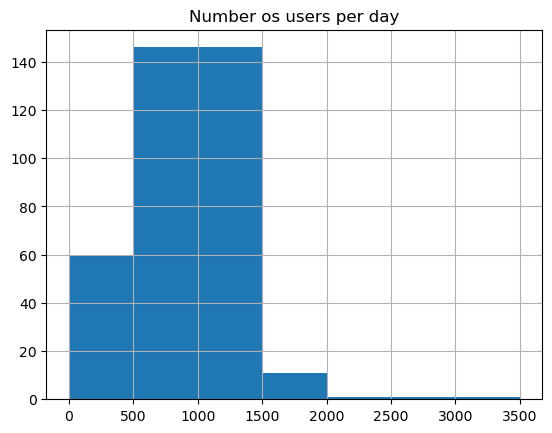

In [27]:
# Construindo os dataframes com informações de usuários
# Agrupando por dia

users_per_day = df_visits_log_us.groupby(['session_day']).agg({'uid':'nunique'})


# Para visualização dos dados serão construídos histogramas.
print(users_per_day.describe())

# Dia - Histograma
users_per_day.hist(bins=[0,500,1000,1500,2000,3500])
plt.title('Number os users per day')
plt.show()

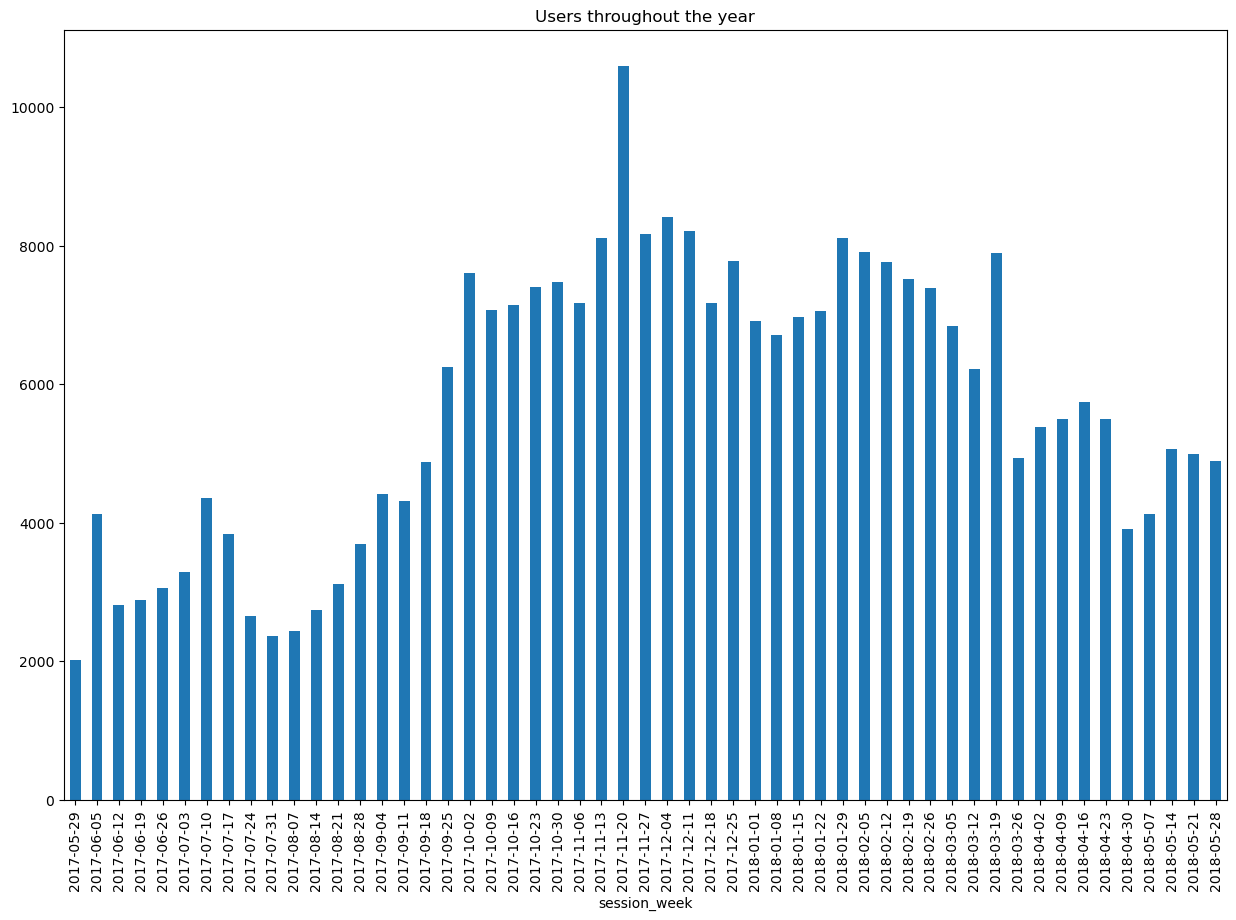

In [28]:
# Agrupando por semana

users_per_week = df_visits_log_us.groupby(['session_week']).agg({'uid':'nunique'})

# Plotando de acordo com a semana

users_per_week.plot(y='uid',
                   kind='bar',
                   title='Users throughout the year',
                   legend=False,
                   figsize=(15,10))

plt.show()

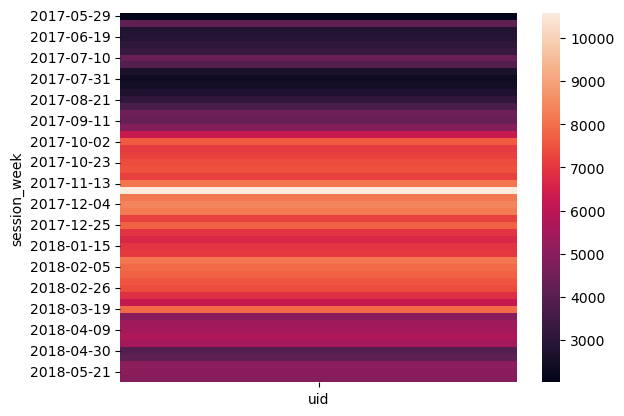

In [29]:
# Visualizando no Seaborn

sns.heatmap(users_per_week,
            fmt='.2g',
            linecolor='black',
            annot=False)
plt.show()

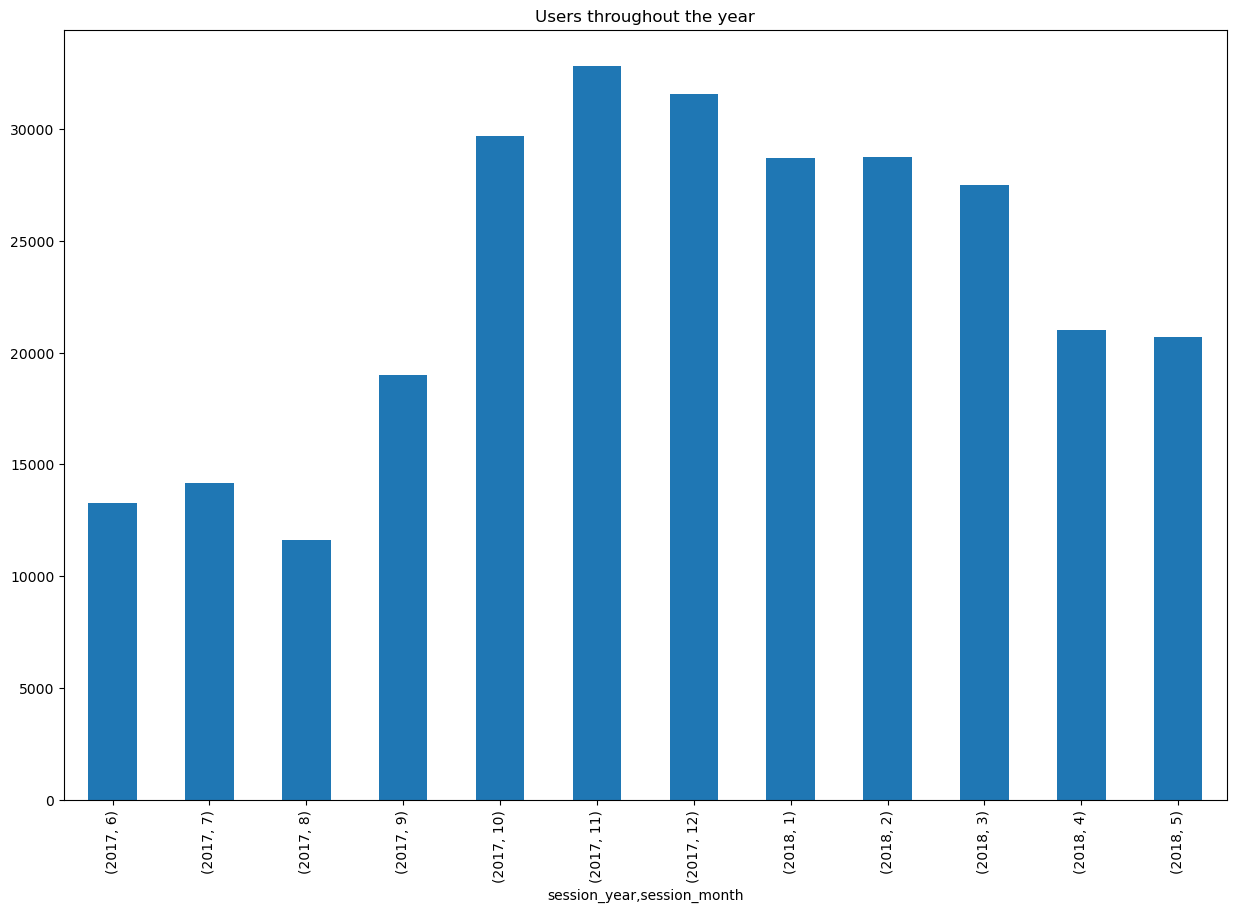

In [30]:
# Agrupando por mês

users_per_month = df_visits_log_us.groupby(['session_year','session_month']).agg({'uid':'nunique'})

# Plotando de acordo com a semana

users_per_month.plot(y='uid',
                   kind='bar',
                   title='Users throughout the year',
                   legend=False,
                   figsize=(15,10))

plt.show()

In [31]:
# Checando a procentagem de usuários únicos nos meses

(users_per_month['uid']/users_per_month['uid'].sum()).sort_values(ascending=False)

session_year  session_month
2017          11               0.117661
              12               0.113213
              10               0.106522
2018          2                0.103139
              1                0.103020
              3                0.098561
              4                0.075367
              5                0.074266
2017          9                0.068074
              7                0.050882
              6                0.047567
              8                0.041727
Name: uid, dtype: float64

Os dias tipicamente tem entre 500 e 1500 usuários, sendo que 75% dos dias se tem menos do 1173 usuários.

A semana varia de 3000 para 10000 usuários, dependendo da época do ano. Se observa uma quantidade maior de usuários na metade do período estudado, que são os meses de outubro de 2017 até março de 2018. A semana do dia 20-11-2017 foi a semana que teve mais usuários, ultrapassando a marca de 10000.

Já os meses seguem um padrão parecido com o da semana, tendo seu maior número de usuários no final de 2017 e começo de 2018. 

## Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).

In [32]:
# Como um usuário pode realizar diversar sessões, e cada linha é uma sessão, é necessário contar o número de linhas por dia

sessions_per_day = df_visits_log_us.groupby(['session_day'])['device'].count().reset_index()
sessions_per_day.rename(columns={'device':'n_sessions'}, inplace=True)

In [33]:
sessions_per_day_treated = sessions_per_day.merge(df_visits_log_us,on='session_day')[['session_day','session_month','session_year','n_sessions']]

sessions_per_day_treated.drop_duplicates(inplace=True)

sessions_per_day_treated['yyyymm'] = sessions_per_day_treated['session_year']*100+sessions_per_day_treated['session_month']

In [34]:
sessions_per_day_treated['session_date']=sessions_per_day_treated['session_day']

sessions_per_day_treated['session_day']=pd.to_datetime(sessions_per_day_treated['session_date']).dt.day

In [35]:
sessions_per_day_treated.drop(columns=['session_month','session_year'],inplace=True)

In [36]:
# Método describe do número de sessões por dia

sessions_per_day_treated['n_sessions'].describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: n_sessions, dtype: float64

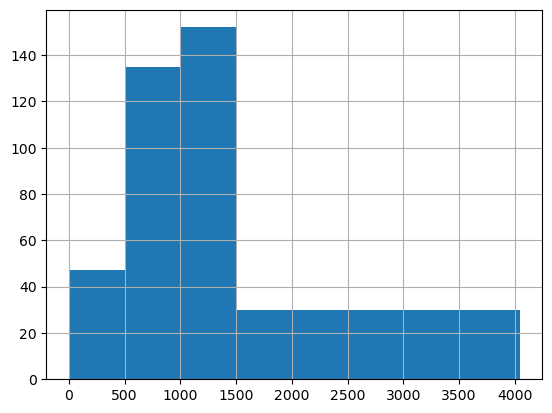

In [37]:
#Visualização da coluna no histograma

sessions_per_day_treated['n_sessions'].hist(bins=[0,500,1000,1500,4045])

plt.show()

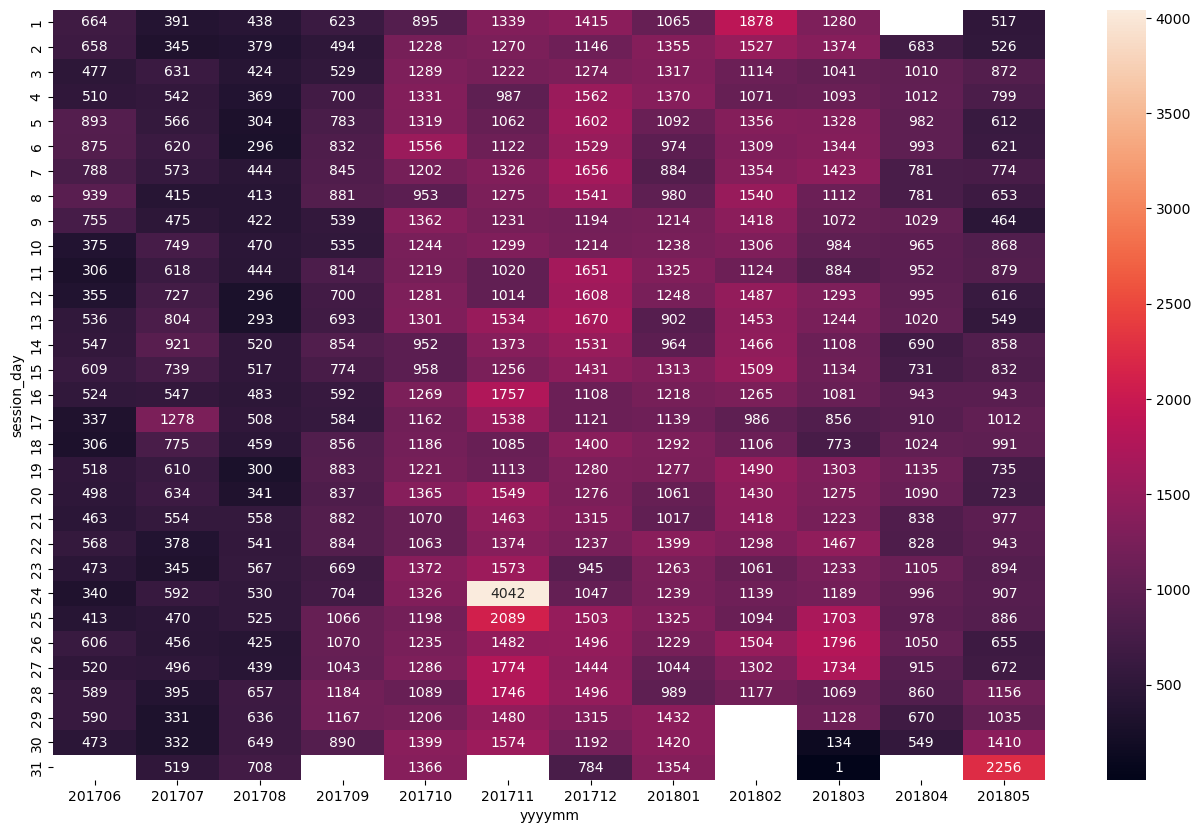

In [38]:
# Visualização do número de sessões (na linha dia, na coluna o mês) para investigar melhor sazonalidade

sessions_per_day_heatmap = pd.pivot_table(sessions_per_day_treated,
                                          index='session_day',
                                          columns='yyyymm',
                                          values='n_sessions',
                                          aggfunc='sum')
# Visualizando no Seaborn
plt.figure(figsize = (16,10))

sns.heatmap(sessions_per_day_heatmap,
            fmt='.4g',
            linecolor='black',
            annot=True)


plt.show()

## Sessões por dia - comentário

Em média ocorrem 987 sessões por dia, sendo que o mínimo de sessões para um dia foi 1 e o máximo foi de 4042. 50% dos dias tiveram menos do que 1003 sessões, e em 75% deles houve menos do que 1280 sessões.

Podemos notar uma presença de sazonalidade nos dados pelo gráfico de heatmap - os meses do final de 2017 (como 201711 e 201712) estão mais claros que os meses do meio de 2017 (como 201706 e 201707).

O valor máximo de um dia aconteceu no dia 24 de novembro, e tem um valor bem maior que os demais. O segundo maior valor é de 2256. Seria interessante entender o motivo de tantas sessões nesse dia.

Os valores fazem sentido pois são maiores do que a análise feita anteriormente (de usuários por dia). Isso acontece pois um usuário pode realizar mais de uma sessão.

## Que comprimento tem cada sessão?

In [39]:
#Construindo a feature session_lenght (em segundos)

df_visits_log_us['session_lenght_s']= (df_visits_log_us['end_ts'] - df_visits_log_us['start_ts']).dt.seconds

df_visits_log_us['session_lenght_s'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_lenght_s, dtype: float64

In [40]:
# Podemos perceber que existem sessões com duração = 0

print(df_visits_log_us['session_lenght_s'][df_visits_log_us['session_lenght_s']==0].count())

df_visits_log_us['session_lenght_s'][df_visits_log_us['session_lenght_s']==0].count()/df_visits_log_us['session_lenght_s'].count()

# Quase 10% das sessões são iguais a 0

35794


0.0995937673900946

In [41]:
# Para análise do comprimento das sessões, vamos descartar aquelas com a duração = 0

df_visits_log_us_valid_sessions = df_visits_log_us[df_visits_log_us['session_lenght_s']>0]

In [42]:
# Investignado a duração das sessões

df_visits_log_us_valid_sessions['session_lenght_s'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: session_lenght_s, dtype: float64

In [43]:
df_visits_log_us_valid_sessions['session_lenght_s'].sort_values(ascending=False).head(10)

#Podemos ver que as duas maiores sessões são aproximadamente o dobro da terceira maior

4181      84480
177972    83640
229891    42660
177381    35760
248062    32880
1197      32520
221945    31440
337996    30840
125667    30120
342154    29160
Name: session_lenght_s, dtype: int32

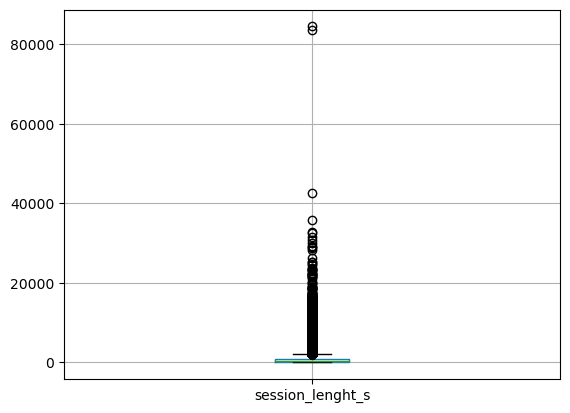

In [44]:
# Visualização no boxplot

df_visits_log_us_valid_sessions.boxplot(column='session_lenght_s')

plt.show()

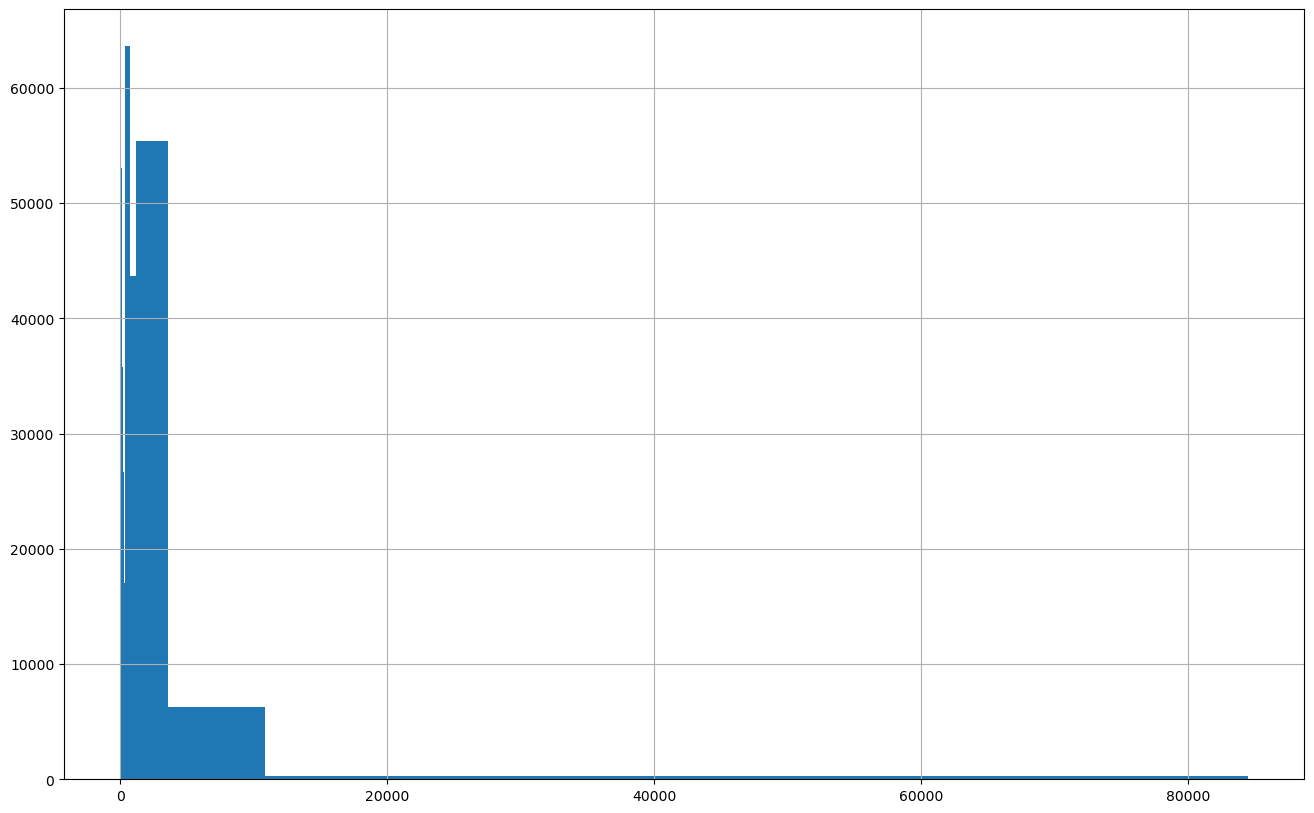

In [45]:
# Visualização no histograma
# Construção de 1,2,3,4,5,6 minutos; 12 minutos; 20 minutos, 1 hora, 3 horas e o maximo do dataframe

plt.figure(figsize = (16,10))

df_visits_log_us_valid_sessions['session_lenght_s'].hist(bins=[0,60,120,180,240,300,360,720,1200,3600,10800,84480])

plt.show()

## Comprimentos das sessões - comentário

O primeiro ponto é que existem várias sessões com duração de 0 segundos. Esse ponto deveria ser investigado os times internos para se entender o por que. Para fins do projeto, foram desconsideradas as sessões de 0 segundos.

Para as sessões válidas, pode-se observar a seguinte distribuição:

Em média a sessão dura 714 segundos, sendo que o mínimo que uma sessão demorou foi 19 segundos e o máximo foi de 84440. 50% das sessões duraram menos que 360 segundos, e em 75% delas a duração foi menor que 900 segundos. Essa distribuição indica a presença de outliers, pois o valor máximo está muito discrepante dos demais e a média está bem acima da mediana.

Investigando os maiores valores do dataset pode-se notar que os dois maiores valores são aproximadamente o dobro do terceiro maior, e a diferença é de 40000 segundos.

Os histograma e o boxplot nos mostram uma distribuição não uniforme. A grande maioria dos valores está concentrada em um pequeno range de segundos, os valores ficam mais espaçados para as sessões maiores.

## Com que frequência os usuários voltam?

In [46]:
# A frequencia com que cada usuário volta pode ser calculada contando o número de sessões por usuário, por período.

# Sessões por dia - Vamos considerar apenas as sessões com duração > 0

sessions_per_user_day = df_visits_log_us_valid_sessions.groupby(['uid','session_day'])['device'].count().reset_index()
sessions_per_user_day.rename(columns={'device':'session_number'},inplace=True)

# Sessões por semana - Vamos considerar apenas as sessões com duração > 0

sessions_per_user_week = df_visits_log_us_valid_sessions.groupby(['uid','session_week'])['device'].count().reset_index()
sessions_per_user_week.rename(columns={'device':'session_number'},inplace=True)

# Sessões por mês - Vamos considerar apenas as sessões com duração > 0

sessions_per_user_month = df_visits_log_us_valid_sessions.groupby(['uid','session_month','session_year'])['device'].count().reset_index()
sessions_per_user_month.rename(columns={'device':'session_number'},inplace=True)

In [47]:
# No dia

print(sessions_per_user_day['session_number'].describe(percentiles=[.25, .5, .75, .9]))

# A grande maioria dos usuários não volta no mesmo dia. 

# Vamos descobrir o percentil dos usuários que voltam no mesmo dia

sessions_per_user_day['session_number'].rank(method='min',pct=True).loc[sessions_per_user_day['session_number']==2].drop_duplicates()

count    297601.000000
mean          1.087382
std           0.371075
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
90%           1.000000
max          10.000000
Name: session_number, dtype: float64


11    0.931845
Name: session_number, dtype: float64

In [48]:
# Na semana

print(sessions_per_user_week['session_number'].describe())

# A grande maioria dos usuários não volta no mesmo dia. 

# Vamos descobrir o percentil dos usuários que voltam no mesmo dia

sessions_per_user_week['session_number'].rank(method='min',pct=True).loc[sessions_per_user_week['session_number']==2].drop_duplicates()

count    272860.000000
mean          1.185978
std           0.862051
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          38.000000
Name: session_number, dtype: float64


11    0.892439
Name: session_number, dtype: float64

In [49]:
# No mês

print(sessions_per_user_month['session_number'].describe(percentiles=[.25, .5, .75, .9]))

# A grande maioria dos usuários não volta no mesmo dia. 

# Vamos descobrir o percentil dos usuários que voltam no mesmo dia

sessions_per_user_month['session_number'].rank(method='min',pct=True).loc[sessions_per_user_month['session_number']==2].drop_duplicates()

count    251469.000000
mean          1.286862
std           1.667806
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
90%           2.000000
max         134.000000
Name: session_number, dtype: float64


13    0.857593
Name: session_number, dtype: float64

## Reincidência dos usuários - comentário

Para investigar com que frequência os usuários voltam foi contado o número de sessões por usuário por período: dia, semana e mês. Foram consideras apenas sessões nas quais o usuário ficou mais do que 0 segundos.

93.18% dos usuários não voltam no mesmo dia, 89.24% deles não volta na mesma semana e 85.75% não voltam no mesmo mês. A grande maioria dos visitantes do site são não recorrentes.

Um ponto importante a se destacar é que a análise foi feita com datas fechadas. Em outras palavras a contagem de sessões foi feita por usuário e por período (dia específico, semana específica e mês específico) e não em relação a sua última sessão. Por exemplo, um usuário que realizou uma sessão as 23:50 no dia 29-11 e outra as 00:15 no dia 01-12 foi considerado como um usuário que não voltou no dia 29-11 e não voltou no mês de novembro.     

# Relatório de Vendas

## Quando as pessoas começam a comprar?

*(Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)*

In [50]:
# Para descobrir quando as pessoas começam a comprar, precisamos descobrir a primeira data de compra do usuario

df_orders_log_us_first_order = df_orders_log_us.groupby('uid')['buy_ts'].min().reset_index()

# Renomenado a coluna 'buy_ts'
df_orders_log_us_first_order.rename(columns={'buy_ts':'first_buy_ts'},
                                    inplace=True)

df_orders_log_us_first_order.sample(15)

,uid,first_buy_ts
18360,9302286328021374069,2017-09-24 18:28:00
31721,16019273975366706094,2017-10-06 00:41:00
1937,999906621142257600,2018-01-26 22:16:00
34990,17660096978067966316,2018-03-22 07:50:00
31466,15880124820348714265,2017-12-18 19:43:00
18653,9448253950569468723,2018-02-12 14:37:00
36478,18417227789295707563,2018-05-06 17:47:00
4368,2203547959740286028,2017-11-28 14:49:00
19733,9961634115677480875,2018-05-31 10:02:00
34890,17603625224004826881,2017-10-15 00:24:00


In [51]:
# Join com a tabela raw

df_orders_log_us_treated = df_orders_log_us.merge(df_orders_log_us_first_order,
                                                  on='uid',
                                                  how='inner')

# Calculando a diferença em dias da data da compra e da data da primeira compra

df_orders_log_us_treated['days_since_first_buy'] = (df_orders_log_us_treated['buy_ts']-df_orders_log_us_treated['first_buy_ts']).dt.days

df_orders_log_us_treated.sample(10)

,buy_ts,revenue,uid,first_buy_ts,days_since_first_buy
40724,2018-03-05 16:55:00,5.80,16245121322547640647,2018-03-05 16:55:00,0
20004,2017-11-04 17:37:00,4.89,15118920339128305091,2017-11-04 17:37:00,0
2408,2017-06-08 09:09:00,0.73,4786731233978467887,2017-06-08 09:09:00,0
11220,2018-04-13 22:16:00,1.83,18136156672647998349,2017-09-16 10:03:00,209
42871,2018-04-17 18:46:00,0.61,18259057636672939768,2018-03-21 10:39:00,27
29821,2017-12-25 13:29:00,1.67,16556879636888277118,2017-12-25 13:29:00,0
43279,2018-03-23 16:46:00,2.20,18307922005422189966,2018-03-23 16:46:00,0
42236,2018-03-16 14:45:00,6.97,7500756731949173082,2018-03-16 14:45:00,0
47878,2018-05-11 15:30:00,14.67,10124669988530398761,2018-05-11 15:30:00,0
32549,2018-01-11 14:08:00,2.93,8903612315610585485,2018-01-11 14:08:00,0


In [52]:
#Construção de coluna de data

df_orders_log_us_treated['buy_ts_date']=df_orders_log_us_treated['buy_ts'].dt.date

In [53]:
# Investigando a coluna 'days_since_first_buy'

print(df_orders_log_us_treated['days_since_first_buy'].describe())

# Descobrindo a porcentagem de compras que foram feitas no mesmo dia

df_orders_log_us_treated['days_since_first_buy'].rank(method='min',pct=True).loc[df_orders_log_us_treated['days_since_first_buy']==1].drop_duplicates()

count    50415.000000
mean        19.298820
std         53.167262
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        363.000000
Name: days_since_first_buy, dtype: float64


9    0.773698
Name: days_since_first_buy, dtype: float64

## Idade dos compradores - comentário

Para investigar qual o perfil de usuário que realiza as compras foi investigado o dataframe de pedidos (df_orders_log_us). Foram adicionadas o *timestamp* da primeira compra e a diferença da primeira compra e da compra atual em dias, na coluna *days_since_first_buy*.

Como cada linha é uma compra, pode-se investigar a idade dos compradores pela coluna *days_since_first_buy*. Pelo método describe pode-se ver que muitos dos valores dessa coluna estão preenchidos com 0, o que indica que a maioria das compras é feita por usuários que não tinham comprado em outra data.

Foi realizado o cálculo o percentil e aproximadamente 77% das compras foi realizada em D0. A grande maioria das compras foi feita no mesmo dia.

## Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [54]:
# Construindo as safras/coortes

df_orders_log_us_treated['first_buy_yyyymm']=df_orders_log_us_treated['first_buy_ts'].dt.year*100+df_orders_log_us_treated['first_buy_ts'].dt.month

# Agrupando os tempos desde a primeira compra 

df_orders_log_us_treated['days_since_first_buy_grouped'] = df_orders_log_us_treated['days_since_first_buy']

df_orders_log_us_treated['days_since_first_buy_grouped'].loc[df_orders_log_us_treated['days_since_first_buy']==0] = '0 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>0)&(df_orders_log_us_treated['days_since_first_buy']<=7)] = '1 a 7 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>7)&(df_orders_log_us_treated['days_since_first_buy']<=14)] = '8 a 14 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>14)&(df_orders_log_us_treated['days_since_first_buy']<=21)] = '14 a 21 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>21)&(df_orders_log_us_treated['days_since_first_buy']<=30)] = '22 a 30 dias'

df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>30)&(df_orders_log_us_treated['days_since_first_buy']<=90)] = '31 a 90 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[(df_orders_log_us_treated['days_since_first_buy']>90)&(df_orders_log_us_treated['days_since_first_buy']<=180)] = '91 a 180 dias'
df_orders_log_us_treated['days_since_first_buy_grouped'].loc[df_orders_log_us_treated['days_since_first_buy']>180] = 'Mais que 6 meses'


# Checando se funcionou

df_orders_log_us_treated[['days_since_first_buy','days_since_first_buy_grouped']].drop_duplicates()

C:\Users\Felipe\AppData\Local\Temp\ipykernel_12628\2556144406.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders_log_us_treated['days_since_first_buy_grouped'].loc[df_orders_log_us_treated['days_since_first_buy']==0] = '0 dias'


,days_since_first_buy,days_since_first_buy_grouped
0,0,0 dias
7,4,1 a 7 dias
9,1,1 a 7 dias
11,3,1 a 7 dias
12,6,1 a 7 dias
...,...,...
3928,17,14 a 21 dias
4662,157,91 a 180 dias
4666,158,91 a 180 dias
4725,321,Mais que 6 meses


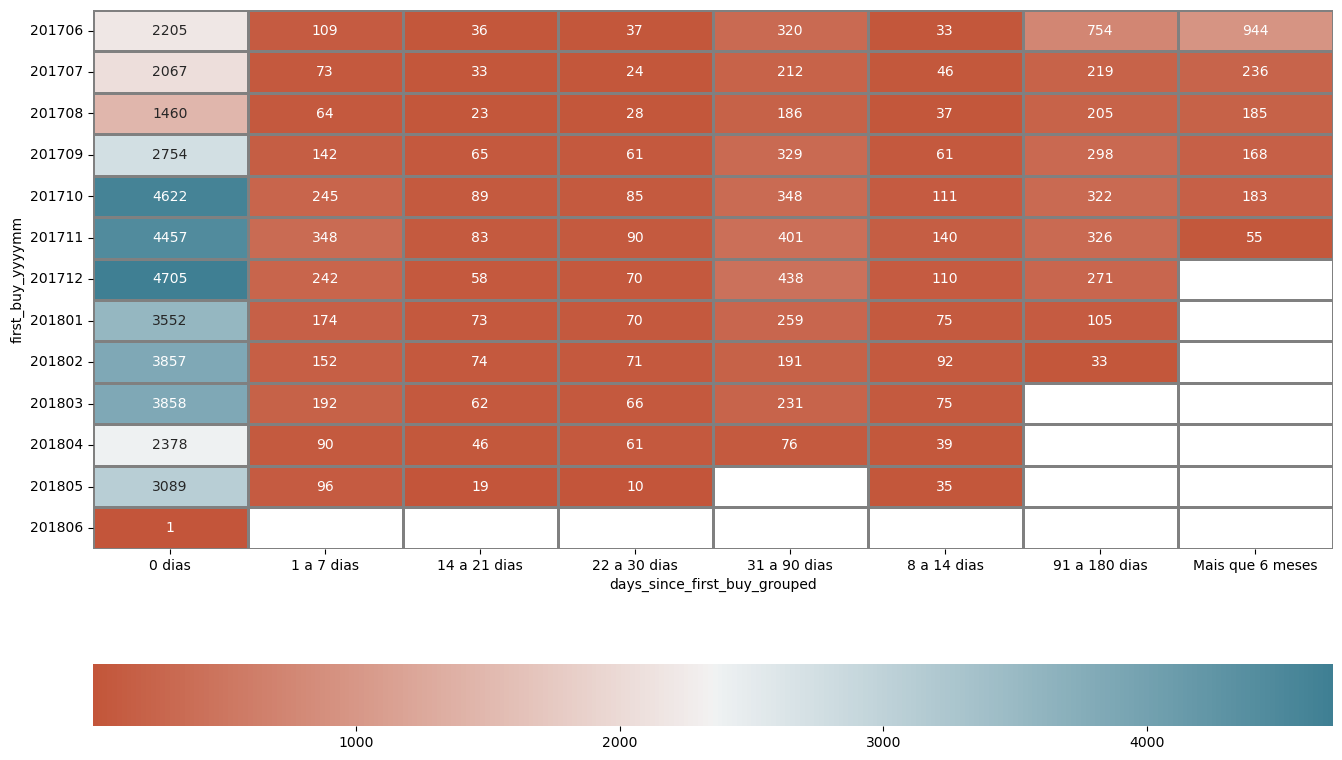

In [55]:
# Construindo analise de coorte para a quantidade de compras

purchases_cohort_count = pd.pivot_table(df_orders_log_us_treated,
                                        index='first_buy_yyyymm',
                                        columns='days_since_first_buy_grouped',
                                        values='revenue',
                                        aggfunc='count')

# Visualizando no Seaborn
plt.figure(figsize = (16,10))


sns.heatmap(purchases_cohort_count,
            fmt='.5g',
            linecolor='grey',
            linewidths=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
            cbar_kws= {'orientation': 'horizontal'},
            annot=True)

plt.title='Quantidade de compras por coorte'
plt.yticks(rotation=0)

plt.show()

## Idade dos compradores por coorte - comentário

Nessa sessão foram investigados diferentes cohortes. Os cohortes nesse caso são os grupos de usuários que fizeram a primeira compra no mesmo mês. Nessa análise nós queremos ver se existe alguma diferença relevante entre os diferentes grupos.

O que podemos destacar é que as Safras de do começo do dataset e do final compraram menos que as safras intermediárias. Isso faz sentido com o que foi apresentado até agora. Como a maioria das compras foi feita no mesmo dia e o meses com mais compras foram os intermediários é de se esperar também que os grupos com mais compras sejam os intermediários.

## Qual é o volume médio de uma compra?

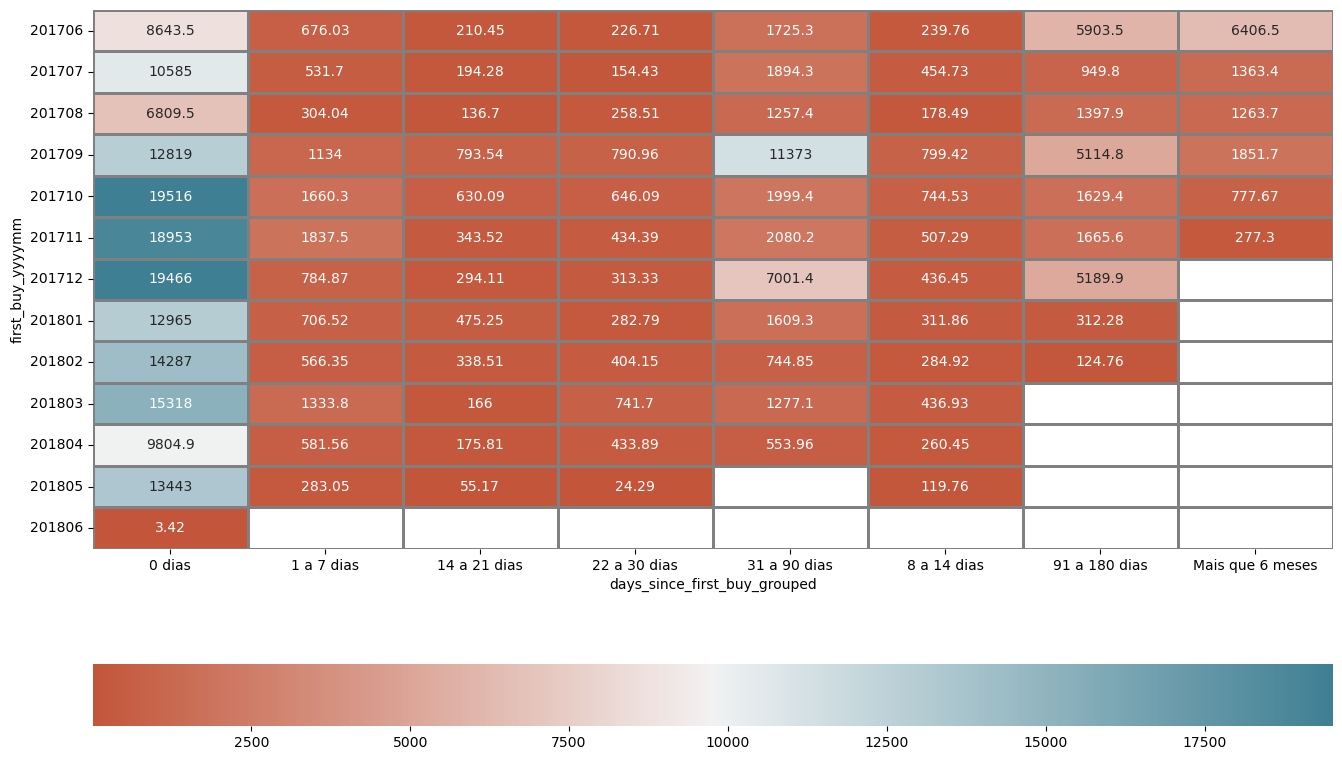

In [56]:
# Analise similar a anterior, porém considerando o montante total das receitas

purchases_cohort_sum = pd.pivot_table(df_orders_log_us_treated,
                                        index='first_buy_yyyymm',
                                        columns='days_since_first_buy_grouped',
                                        values='revenue',
                                        aggfunc='sum')

# Visualizando no Seaborn
plt.figure(figsize = (16,10))


sns.heatmap(purchases_cohort_sum,
            fmt='.5g',
            linecolor='grey',
            linewidths=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
            cbar_kws= {'orientation': 'horizontal'},
            annot=True)

plt.title ='Analise de receita por coorte'
plt.yticks(rotation=0)

plt.show()

## Volume de compras por coorte - comentário

Nessa sessão foram investigados foi feita uma análise similar a anterior, porém foi considerado quanto cada grupo trouxe de receita, e não quantas compras foram feitas por cada um.

O destaque feito aqui foi o da safra 201709 no período de 30 a 90 dias, que comprou um volume grande. É necessário entender as causas do volume maior de compras dessa safra nesse período.

## Quanto dinheiro os clientes trazem para a empresa ao longo de sua vida(LTV)?

In [57]:
# Para realizar a análise do LTV, vamos adicionar o número de usuários por coorte

df_orders_log_us_cohort_sizes = df_orders_log_us_treated.groupby('first_buy_yyyymm').agg({'uid':'nunique'})

#Renomeando a coluna 'uid'

df_orders_log_us_cohort_sizes.rename(columns={'uid':'cohort_size'},inplace=True)

df_orders_log_us_cohort_sizes.sample(10)

,cohort_size
first_buy_yyyymm,
201805,2988
201706,2023
201711,4081
201708,1370
201802,3651
201803,3533
201806,1
201710,4340
201801,3373


In [58]:
# Ja temos a tabela dinâmica indicando quanto a cohorte trouxe de receita. 
# Agora precisamos dividir os valores pelo tamanho da cohort para saber o LTV médio de cada Safra, mês a mês

pivot_table_ltv_withcohort = purchases_cohort_sum.merge(df_orders_log_us_cohort_sizes,on='first_buy_yyyymm')

pivot_table_ltv_withcohort.sample(10)

,0 dias,1 a 7 dias,14 a 21 dias,22 a 30 dias,31 a 90 dias,8 a 14 dias,91 a 180 dias,Mais que 6 meses,cohort_size
first_buy_yyyymm,,,,,,,,,
201709,12819.28,1134.03,793.54,790.96,11372.63,799.42,5114.80,1851.66,2581
201805,13443.49,283.05,55.17,24.29,NaN,119.76,NaN,NaN,2988
201706,8643.47,676.03,210.45,226.71,1725.26,239.76,5903.49,6406.52,2023
201804,9804.94,581.56,175.81,433.89,553.96,260.45,NaN,NaN,2276
201710,19515.94,1660.30,630.09,646.09,1999.40,744.53,1629.43,777.67,4340
201708,6809.54,304.04,136.70,258.51,1257.38,178.49,1397.92,1263.68,1370
201806,3.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
201707,10585.20,531.70,194.28,154.43,1894.34,454.73,949.80,1363.44,1923
201712,19465.75,784.87,294.11,313.33,7001.37,436.45,5189.86,NaN,4383


In [59]:
# Precisamos dividir todos os valores do dataframe pela coluna de cohort size para obter o LTV

pivot_table_ltv = pivot_table_ltv_withcohort.div(pivot_table_ltv_withcohort['cohort_size'],axis=0)

# Dropando a coluna cohort_size

pivot_table_ltv.drop(columns='cohort_size',inplace=True)

pivot_table_ltv

,0 dias,1 a 7 dias,14 a 21 dias,22 a 30 dias,31 a 90 dias,8 a 14 dias,91 a 180 dias,Mais que 6 meses
first_buy_yyyymm,,,,,,,,
201706,4.272600,0.334172,0.104029,0.112066,0.852823,0.118517,2.918186,3.166841
201707,5.504524,0.276495,0.101030,0.080307,0.985096,0.236469,0.493916,0.709017
201708,4.970467,0.221927,0.099781,0.188693,0.917796,0.130285,1.020380,0.922394
201709,4.966788,0.439376,0.307454,0.306455,4.406288,0.309733,1.981713,0.717420
201710,4.496760,0.382558,0.145182,0.148869,0.460691,0.171551,0.375445,0.179187
201711,4.644227,0.450265,0.084175,0.106442,0.509735,0.124305,0.408145,0.067949
201712,4.441193,0.179071,0.067102,0.071488,1.597392,0.099578,1.184089,NaN
201801,3.843795,0.209463,0.140898,0.083839,0.477115,0.092458,0.092582,NaN
201802,3.913164,0.155122,0.092717,0.110696,0.204013,0.078039,0.034171,NaN


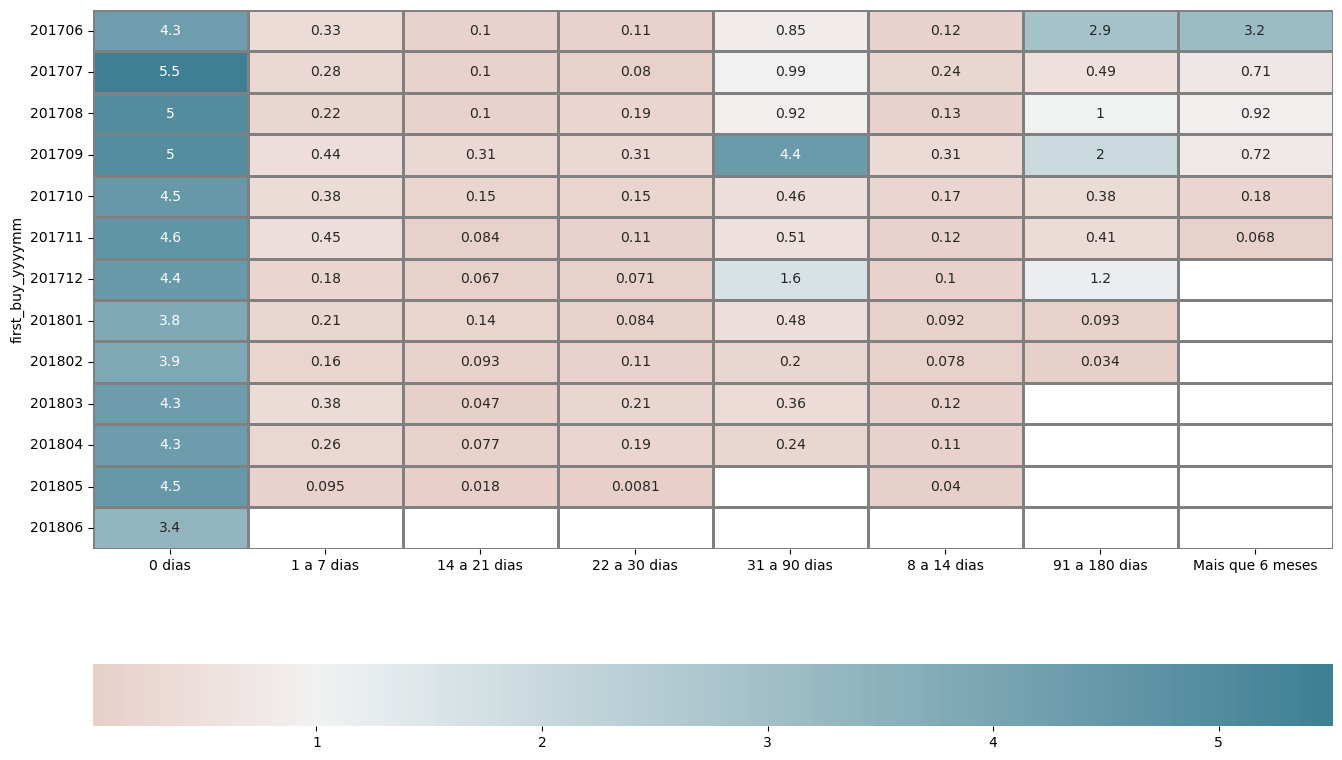

In [60]:
# Visualizando no Seaborn
plt.figure(figsize = (16,10))


sns.heatmap(pivot_table_ltv,
            fmt='.2g',
            linecolor='grey',
            linewidths=1,
            center=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
            cbar_kws= {'orientation': 'horizontal'},
            annot=True)

plt.title ='Analise de LTV por coorte'
plt.yticks(rotation=0)

plt.show()

## LTV por coorte - comentário

O problema de se investigar apenas a receita dos cohortes é que ela não considera o tamanho desses cohortes. Um cohorte com mais clientes **deveria trazer mais receita quando comparado a um grupo menor**.

Nessa sessão a receita dos cohortes foi ajsutada pelo seu tamanho. Ou seja, foi calculado qual a receita média trazida por cada cliente. Essa análise visa responder a perguntas do tipo: "Existe algum grupo de clientes, que, proporcionalmente, traz mais receita que outros?"

Interessante observar que o padrão aqui muda do observado anteriormente. **Os diferentes cohortes, quando ajustados por tamanho, trazem uma receita similar.**

# Relatório de Marketing

## Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [61]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [62]:
df_costs.sample(10)

,source_id,dt,costs
928,3,2017-12-20,624.59
403,2,2017-07-11,108.81
2,1,2017-06-03,36.53
1357,4,2018-02-24,180.81
1821,9,2017-06-06,10.52
744,3,2017-06-19,347.54
1888,9,2017-08-12,2.83
1935,9,2017-09-28,17.70
603,2,2018-01-27,129.01
236,1,2018-01-23,70.27


In [63]:
df_costs['source_id'].value_counts()

source_id
5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: count, dtype: int64

In [64]:
# Fazer um gráfico de barras com os custos ao longo do tempo - Por mês

df_costs_treated = df_costs

df_costs_treated['yyyymm'] = df_costs_treated['dt'].dt.year*100+df_costs_treated['dt'].dt.month

In [65]:
#Agrupando os custos por mês e source_ida

df_costs_bymonth = pd.pivot_table(df_costs_treated,
                                  index='yyyymm',
                                  columns='source_id',
                                  values='costs',
                                  aggfunc='sum')

df_costs_bymonth

source_id,1,2,3,4,5,9,10
yyyymm,,,,,,,
201706,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
201707,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
201708,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
201709,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
201710,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
201711,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
201712,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
201801,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
201802,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


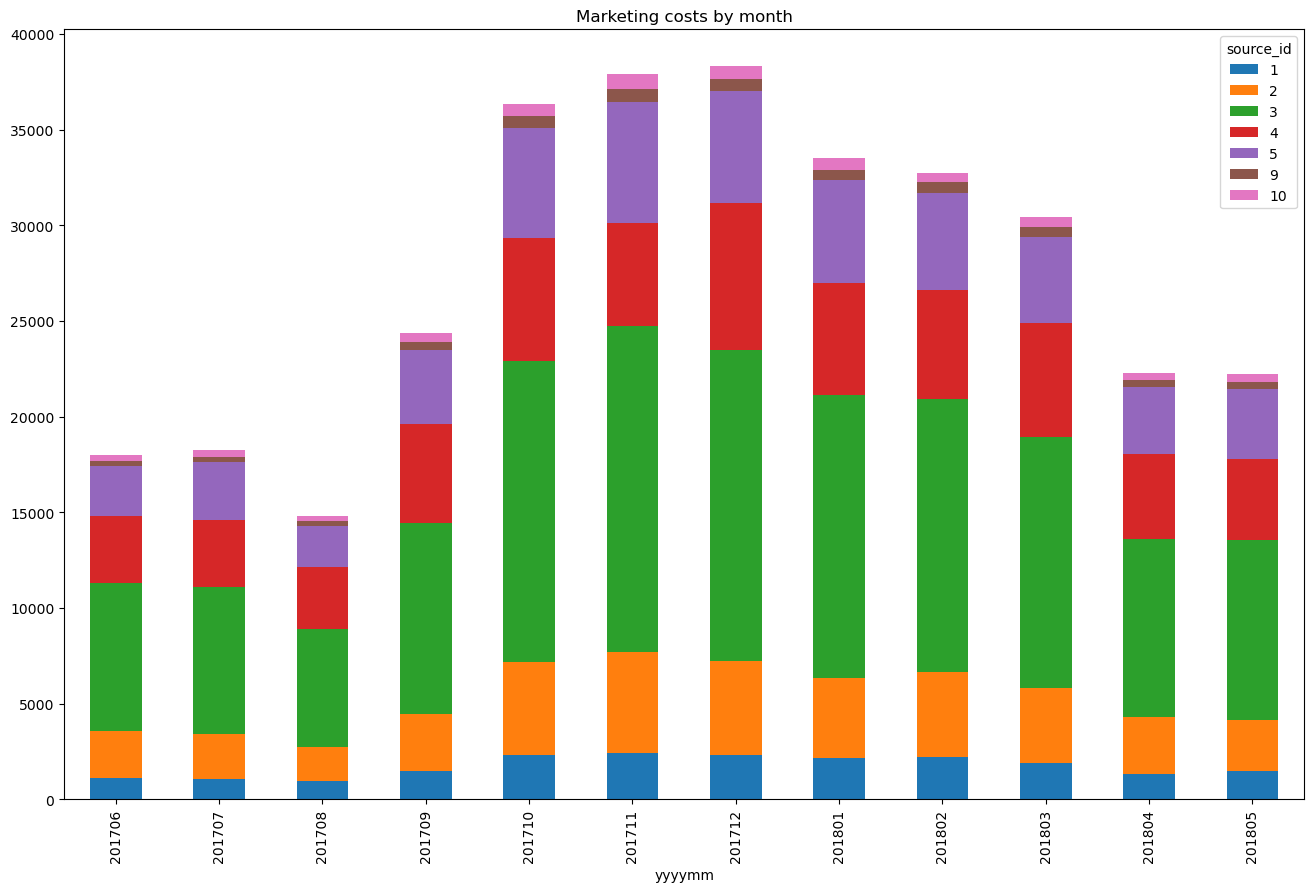

In [66]:
# Fazendo o gráfico de barras por mês, com a quebra dos custos por canal 

df_costs_bymonth.plot(stacked=True,
                      kind='bar',
                      title='Marketing costs by month',
                      figsize = (16,10))

plt.show()

In [67]:
# Plotando a soma total de gastos

df_costs_bysourceid = df_costs_treated.groupby(by='source_id')['costs'].sum().sort_values()

df_costs_bysourceid

source_id
9       5517.49
10      5822.49
1      20833.27
2      42806.04
5      51757.10
4      61073.60
3     141321.63
Name: costs, dtype: float64

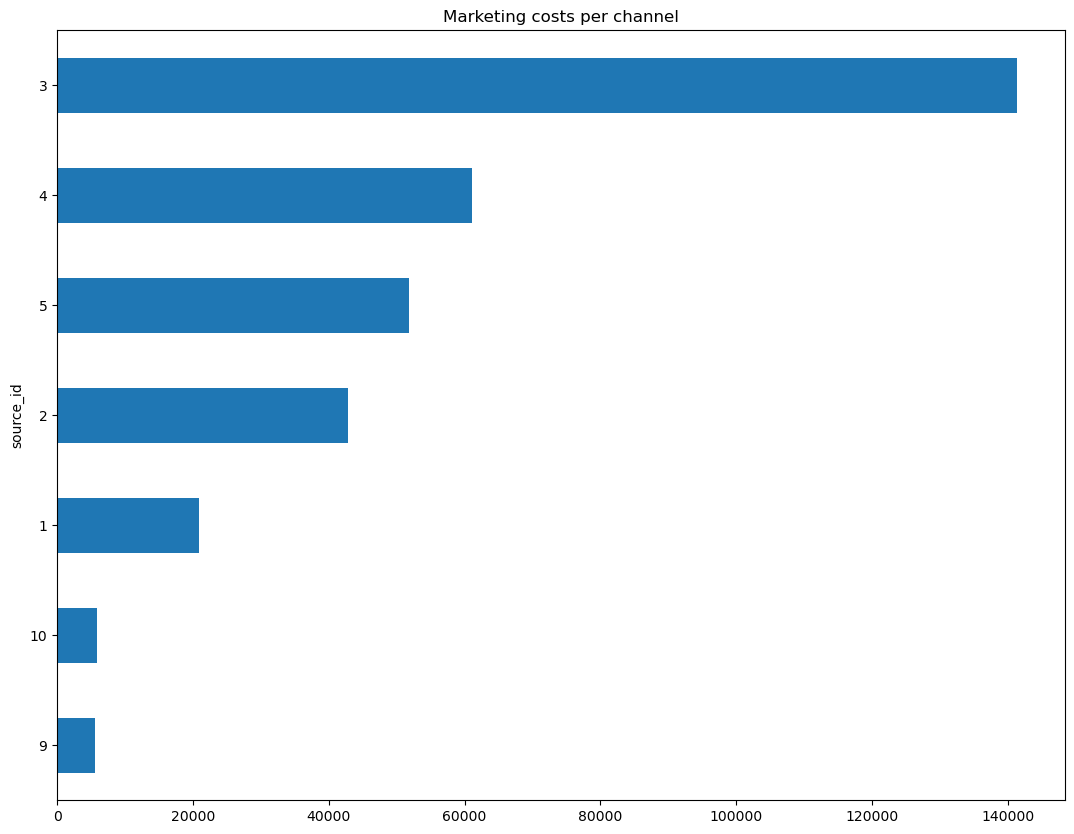

In [68]:
df_costs_bysourceid.plot(kind='barh',
                         title='Marketing costs per channel',
                         figsize=(13,10))
plt.show()

## Quanto custou a aquisição de clientes em cada canal?

In [69]:
# Precisamos descobrir quantos visitantes cada 'source_id' trouxe.

df_visitors_persource = df_visits_log_us_valid_sessions.groupby('source_id').agg({'uid':'nunique'})

# Fazendo o join com a tabela de custos por canal

df_costs_pervistor = df_visitors_persource.join(df_costs_bysourceid)

df_costs_pervistor['cost_per_visitor'] = df_costs_pervistor['costs']/df_costs_pervistor['uid']

df_costs_pervistor

,uid,costs,cost_per_visitor
source_id,,,
1,17960,20833.27,1.159982
2,24152,42806.04,1.772360
3,67284,141321.63,2.100375
4,75080,61073.60,0.813447
5,50921,51757.10,1.016420
6,5,NaN,NaN
7,33,NaN,NaN
9,8504,5517.49,0.648811
10,7208,5822.49,0.807782


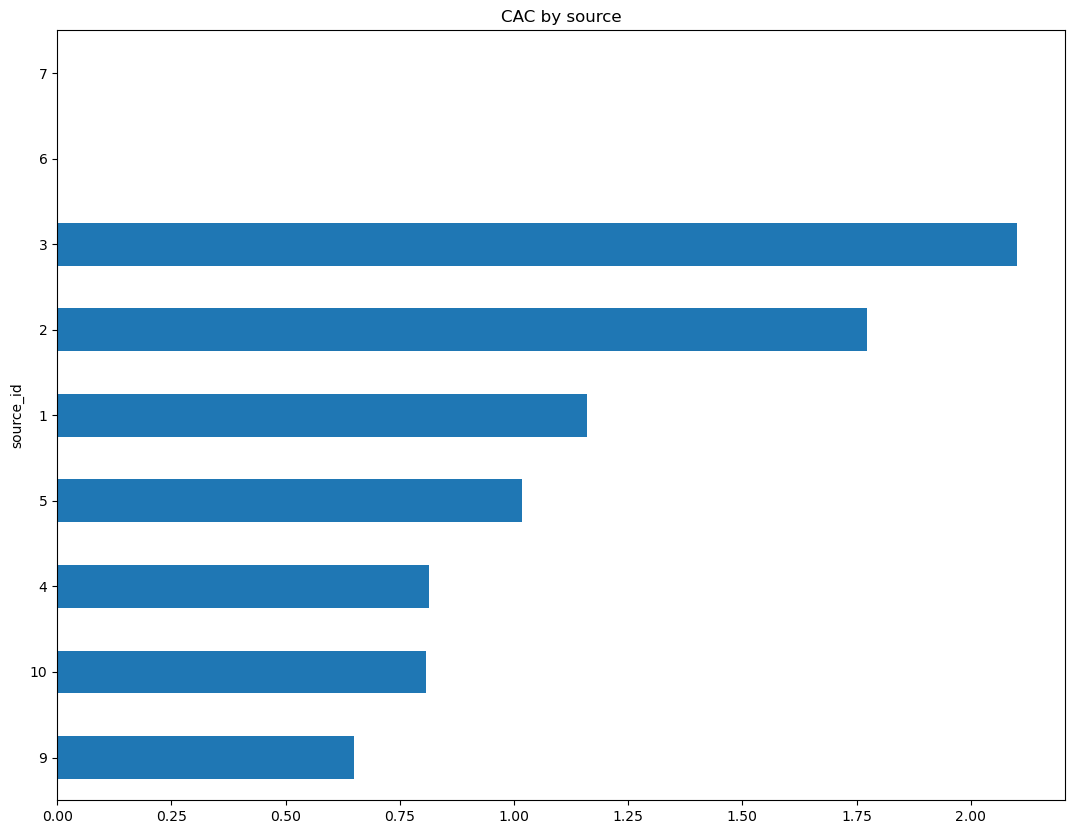

In [70]:
# Plotando o custo por canal

df_costs_pervistor

df_costs_pervistor['cost_per_visitor'].sort_values().plot(kind='barh',
                         title='CAC by source',
                         figsize=(13,10))
plt.show()

In [71]:
# Descobrindo quanto custou aquisição de usuários por mês

df_users_bymonth = pd.pivot_table(df_visits_log_us_valid_sessions,
                                  index=['session_year','session_month'],
                                  columns='source_id',
                                  values='uid',
                                  aggfunc='nunique').reset_index()

df_users_bymonth['yyyymm']=df_users_bymonth['session_year']*100+df_users_bymonth['session_month']

In [72]:
# Selecionando a coluna 'yyyymm' como index

df_users_bymonth.set_index('yyyymm',inplace=True)

# Dropando colunas desnecessárias

df_users_bymonth.drop(columns=['session_year','session_month'],inplace=True)

df_users_bymonth

source_id,1,2,3,4,5,6,7,9,10
yyyymm,,,,,,,,,
201706,912.0,1384.0,3757.0,3245.0,2588.0,NaN,2.0,664.0,392.0
201707,987.0,1598.0,3628.0,3684.0,3274.0,1.0,2.0,520.0,294.0
201708,743.0,1138.0,3053.0,2814.0,2804.0,1.0,1.0,567.0,227.0
201709,1330.0,1970.0,5220.0,4798.0,4376.0,NaN,3.0,708.0,445.0
201710,2049.0,3101.0,7623.0,8585.0,6668.0,NaN,5.0,944.0,822.0
201711,2680.0,3873.0,9170.0,10084.0,5815.0,1.0,1.0,1368.0,799.0
201712,2585.0,3385.0,8293.0,10632.0,5549.0,1.0,9.0,1106.0,542.0
201801,2035.0,2903.0,7622.0,9172.0,5156.0,1.0,4.0,955.0,822.0
201802,2006.0,2896.0,7794.0,8769.0,5300.0,NaN,2.0,934.0,968.0


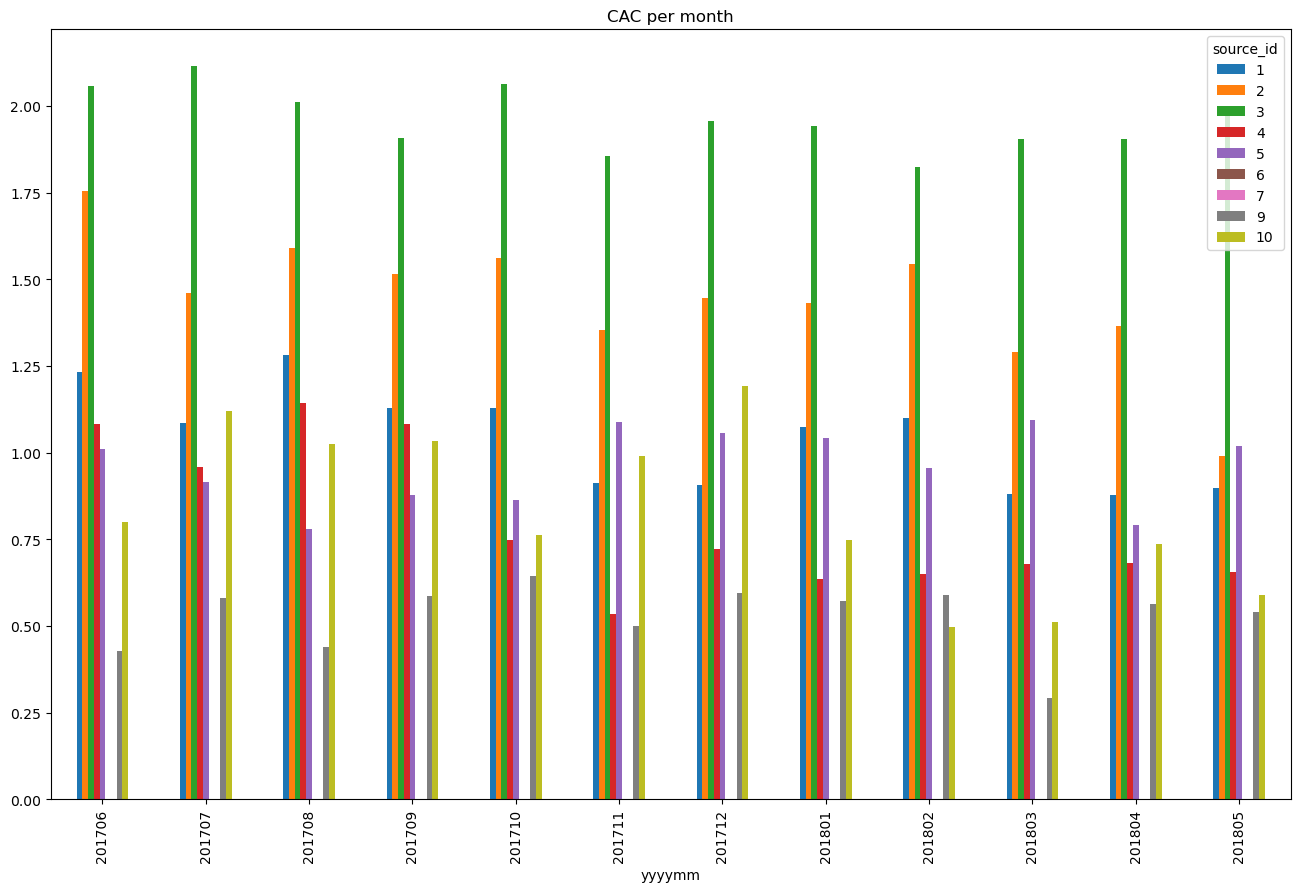

In [73]:
# Cálculo do CAC por mês

df_cac_bymonth = df_costs_bymonth/df_users_bymonth

# Fazendo o gráfico de barras por mês, com a quebra do CAC por canal 

df_cac_bymonth.plot(kind='bar',
                      title='CAC per month',
                      figsize = (16,10))

plt.show()

## CAC por canal - comentário

O canal mais caro para aquisição do cliente é o canal de número 3, com mais de 2 reais por cliente. O canal mais barato de aquisição, desconsiderando os que não tiveram custo, é o de número 9, com menos de 0.75 reais por cliente.

Quando se olha mês a mês, percebe-se que o padrão continua, o canal de número 3(verde) foi o canal mais caro de aquisição de clientes.

## Os investimentos valeram a pena? (ROI)

*Construa gráficos para ver como essas métricas diferem para vários dispositivos e diferentes origens de anúncios e como elas mudam com o tempo.*

Como ja temos a origem dos custos por mês e a receita total, precisamos quebrar a receita por 'source_id', ou seja, caracterizar de onde vieram as compras realizadas. Para fins de projeto vamos considerar que o usuário foi trazido pelo source_id com menor data.

In [74]:
# Construção do ROI por mês. Já temos o custo por mês por canal.

# Montando a origem das receitas

uid_first_visit_by_source = df_visits_log_us_valid_sessions.groupby(['uid','source_id'])['start_ts'].min().reset_index()

uid_first_visit = uid_first_visit_by_source.groupby(['uid'])['start_ts'].min().reset_index()

uid_by_source = uid_first_visit.merge(uid_first_visit_by_source,
                                      how='left',
                                      left_on=['uid','start_ts'],
                                      right_on=['uid','start_ts'])
uid_by_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207051 entries, 0 to 207050
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   uid        207051 non-null  uint64        
 1   start_ts   207051 non-null  datetime64[ns]
 2   source_id  207051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), uint64(1)
memory usage: 4.7 MB


In [75]:
# Dando join com a tabela de compras

df_orders_roi = df_orders_log_us_treated

df_orders_roi = df_orders_roi.merge(uid_by_source,
                    how='left',
                    left_on='uid',
                    right_on='uid')[['uid','source_id','revenue','first_buy_ts','buy_ts','first_buy_yyyymm']]

df_orders_roi['buy_yyyymm'] = df_orders_roi['buy_ts'].dt.year*100 + df_orders_roi['buy_ts'].dt.month

df_orders_roi

,uid,source_id,revenue,first_buy_ts,buy_ts,first_buy_yyyymm,buy_yyyymm
0,10329302124590727494,1.0,17.00,2017-06-01 00:10:00,2017-06-01 00:10:00,201706,201706
1,11627257723692907447,2.0,0.55,2017-06-01 00:25:00,2017-06-01 00:25:00,201706,201706
2,17903680561304213844,2.0,0.37,2017-06-01 00:27:00,2017-06-01 00:27:00,201706,201706
3,16109239769442553005,2.0,0.55,2017-06-01 00:29:00,2017-06-01 00:29:00,201706,201706
4,14200605875248379450,3.0,0.37,2017-06-01 07:58:00,2017-06-01 07:58:00,201706,201706
...,...,...,...,...,...,...,...
50410,12296626599487328624,4.0,4.64,2018-05-31 23:50:00,2018-05-31 23:50:00,201805,201805
50411,11369640365507475976,10.0,5.80,2018-05-31 23:50:00,2018-05-31 23:50:00,201805,201805
50412,1786462140797698849,3.0,0.30,2018-05-31 23:54:00,2018-05-31 23:54:00,201805,201805
50413,3993697860786194247,3.0,3.67,2018-05-31 23:56:00,2018-05-31 23:56:00,201805,201805


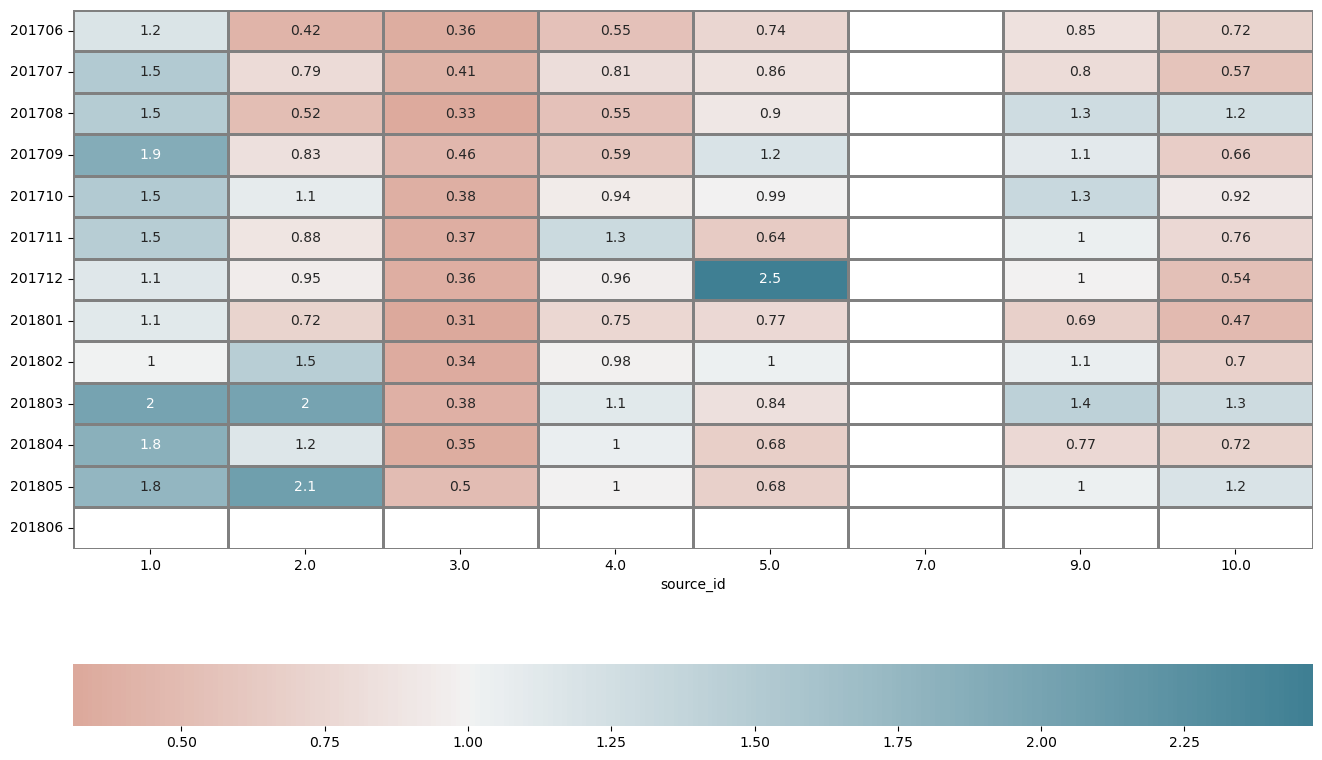

In [76]:
# Podemos calcular quanto cada fonte trouxe de retorno por mês

df_revenue_bymonth = pd.pivot_table(df_orders_roi,
                                  index='buy_yyyymm',
                                  columns='source_id',
                                  values='revenue',
                                  aggfunc='sum')

# O ROI será a receita de cada canal dividido pelos custos de cada canal

df_roi_bymonth = df_revenue_bymonth/df_costs_bymonth

#Plotando no seaborn

# Visualizando no Seaborn
plt.figure(figsize = (16,10))


sns.heatmap(df_roi_bymonth,
            fmt='.2g',
            linecolor='grey',
            linewidths=1,
            center=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True),
            cbar_kws= {'orientation': 'horizontal'},
            annot=True)

plt.title ='Analise de ROI por canal'
plt.yticks(rotation=0)

plt.show()

## ROI por canal - comentário

O heatmap do seaborn mostra o quantos reais voltam para cada real investido no canal. Se o ROI é igual a 1, então a quantidade de receita daquele canal foi igual a quantidade investida. Células com tonalidade marrom tiveram desempenho negativo, células com tonalidade azul tiveram desempenho positivo.  

Em questão de ROI, o canal 1 é o que sempre superou o que foi gasto e o canal 3 é o que nunca passou de 0.5 de ROI.

# Conclusões

*Recomende aos especialistas de marketing quanto dinheiro e onde seria melhor investir.
Quais origens/plataformas você recomendaria? Fundamente sua escolha: em quais métricas você se concentrou? Por quê? Que conclusões você tirou ao encontrar os valores das métricas?*

## Conclusão final

O primeiro ponto a se notar é que existe uma sazonalidade na base. Os clientes visitaram o site e compraram muito mais os produtos nos meses intermediários da base. Na grande maioria dos dias há entre 500 e 1500 visitantes na página.

O time de marketing deveria focar mais em retenção dos cleintes existentes do que na conquista de novos. Os usuários normalmente não voltam, eles não são reincidentes. 85% dos usuários não voltam no mesmo mês. Seria muito mais vantajoso focar em retenção ao invés de conquista de novos clientes.

Os clientes trazem muito dinheiro quando "nascem", mas esse valor decai ao longo da vida. Importante investigar e entender as estratégias utilizadas nas campanhas com a safra 201709, pois ela deu um retorno muito acima da média nas outras safras de 31 a 90 dias. Qual estratégia de marketing foi seguida aqui?

Se investe muito em canais que não dão retorno e pouco em canais que dão retorno. O canal 3 é o que mais que mais se gasta e o que menos da retorno. Recomendo a redução de gastos nesse canal e direcionamento para outro mais efetivo. Por exemplo, poderia se reduzir os gastos com o canal 3 e investir mais no canal 9.